# Trending YouTube video's
_Sandy & co._  
Marit Beerepoot  
Jessy Bosman    
Vincent Damen  
Laura Geerars  
Sander van Wickeren  

# Introductie

_Onderzoeksvraag:_    
Wat zijn de factoren die trending video’s gemeen hebben? 

_Deelvragen:_
1. Welke termen komen het meeste voor in trending video’s?
1. Is er een verschil tussen aantal likes, dislikes en ratio's ertussen?
1. Zijn er verschillen in titels tussen US, GB en CA bij trending video's?





# Literatuur  
* YouTube video views al vaker gebruikt om populariteit te meten  <small>(Xie et al., 2011)</small>
* Trending video's hebben een plotselinge peak in populariteit, bijvoorbeeld door externe events <small>(Crane & Sonette, 2008)  </small>
* Tags maakt het vinden van video's makkelijker <small>(Gill et al, 2007)</small>
* Conformers voten positief op populaire items en negatief op onpopulaire items en dat mavericks dit andersom doen <small>(Yin et al., 2012)</small>

# Methodology:
* Dataset met dagelijkse statistieken van trending YouTube video's
* .csv bestanden
* Data gebruikt van Groot Brittannië, United States en Canada
* Data van 14 november 2017 tot 26 maart 2017
* Bron: Mitchell J op Kaggle

# Data
csv's bevatten de volgende informatie: 
* video ID
* datum waarop de video trending is
* titel
* channel
* tags
* likes
* dislikes
* aantal comments
* beschrijving en upload datum.

In [ ]:
#from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
import random
import re

In [11]:
import pandas as pd
%matplotlib inline
from collections import Counter
# source: https://www.kaggle.com/datasnaek/youtube-new/data
trending = pd.DataFrame.from_csv('USvideos_1.csv')
trending_UK = pd.DataFrame.from_csv("GBvideos.csv")
trending_CA = pd.DataFrame.from_csv("CAvideos.csv")

categories = pd.DataFrame.from_csv("categories.csv",index_col=None)
trending= trending.merge(categories,on="category_id")
trending_UK = trending_UK.merge(categories,on="category_id")
trending_CA = trending_CA.merge(categories,on="category_id")

# Voeg ratios toe
trending['like_view_ratio'] = trending.likes / trending.views
trending['dislike_view_ratio'] = trending.dislikes / trending.views
trending["like_dislike_ratio"] = trending.likes / trending.dislikes

In [6]:
def color_func_red(word, font_size, position, orientation, random_state=None,
                    **kwargs):
    return "hsl(0, 50%%, %d%%)" % random.randint(40, 80)

def color_func_green(word, font_size, position, orientation, random_state=None,
                    **kwargs):
    return "hsl(100, 50%%, %d%%)" % random.randint(40, 80)

def color_func_blue(word, font_size, position, orientation, random_state=None,
                    **kwargs):
    return "hsl(200, 50%%, %d%%)" % random.randint(40, 80)

def gen_word_cloud(data, color, collo):
    
    # Kleuren bepalen
    if color == 1:
        func = color_func_red
    elif color == 2:
        func = color_func_green
    else:
        func = color_func_blue
    
    text = " ".join([re.sub(r"[!.\(\)\[\],\´\';\'\-:\'\"]", "", str(x).lower()) for x in data])

    wordcloud = WordCloud(width=2000, height=1000, relative_scaling = 1, max_words=40, collocations=collo, regexp=r"\w[\S']+",
                          stopwords = stopwords.words('english') # set or space-separated string
                          ).generate(text)
    plt.figure( figsize=(20,10) )
    plt.imshow(wordcloud.recolor(color_func=func, random_state=3),
               interpolation="bilinear")
    plt.axis("off")
    plt.show()     
    
contro = trending[trending.like_dislike_ratio < 1].title.values
for x in contro:
    for y in x.split():
        y.lower()

Counter([y.lower() for x in contro for y in x.split()])

Counter({'#1': 10,
         '#3': 1,
         '#littleones': 1,
         '#metoo': 16,
         '&': 17,
         "'fake'": 2,
         "'i": 7,
         "'monkey'": 3,
         "'n": 2,
         "'sh*thole": 1,
         "'transparent'": 5,
         '(c-span)': 14,
         '(d-ca)': 7,
         '(exclusive)': 9,
         '(full)': 6,
         '(official': 4,
         '*emotional*': 3,
         '-': 15,
         '/': 7,
         '02,': 1,
         '1': 7,
         '1-22-18': 5,
         '1/25/18': 5,
         '10': 5,
         '11,': 1,
         '11:': 6,
         '13,': 2,
         '17,': 7,
         '2017': 9,
         '2018': 45,
         '2018:': 10,
         '2020': 6,
         '23,': 2,
         '3,': 3,
         '33': 4,
         '5': 9,
         '7th': 7,
         'a': 27,
         'about': 20,
         'access': 6,
         'account': 2,
         'accused': 7,
         'accusers': 2,
         'accuses': 6,
         'act': 7,
         'ad': 1,
         'addresses': 13,
        

In [7]:
trending.head()

,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,category_name,like_view_ratio,dislike_view_ratio,like_dislike_ratio
0,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,People & Blogs,0.076869,0.003963,19.395482
1,17.14.11,Me-O Cats Commercial,Nobrand,22,2017-04-21T06:47:32.000Z,"cute|""cats""|""thai""|""eggs""",98966,2486,184,532,https://i.ytimg.com/vi/0mlNzVSJrT0/default.jpg,False,False,False,Kittens come out of the eggs in a Thai commerc...,People & Blogs,0.025120,0.001859,13.510870
2,17.14.11,"AFFAIRS, EX BOYFRIENDS, $18MILLION NET WORTH -...",Shawn Johnson East,22,2017-11-11T15:00:03.000Z,"shawn johnson|""andrew east""|""shawn east""|""shaw...",321053,4451,1772,895,https://i.ytimg.com/vi/STI2fI7sKMo/default.jpg,False,False,False,Subscribe for weekly videos ▶ http://bit.ly/sj...,People & Blogs,0.013864,0.005519,2.511851
3,17.14.11,BLIND(folded) CAKE DECORATING CONTEST (with Mo...,Grace Helbig,22,2017-11-11T18:08:04.000Z,"itsgrace|""funny""|""comedy""|""vlog""|""grace""|""helb...",197062,7250,217,456,https://i.ytimg.com/vi/KODzih-pYlU/default.jpg,False,False,False,Molly is an god damn amazing human and she cha...,People & Blogs,0.036790,0.001101,33.410138
4,17.14.11,Wearing Online Dollar Store Makeup For A Week,Safiya Nygaard,22,2017-11-11T01:19:33.000Z,wearing online dollar store makeup for a week|...,2744430,115426,1110,6541,https://i.ytimg.com/vi/8mhTWqWlQzU/default.jpg,False,False,False,I found this online dollar store called ShopMi...,People & Blogs,0.042058,0.000404,103.987387


# Evaluatie

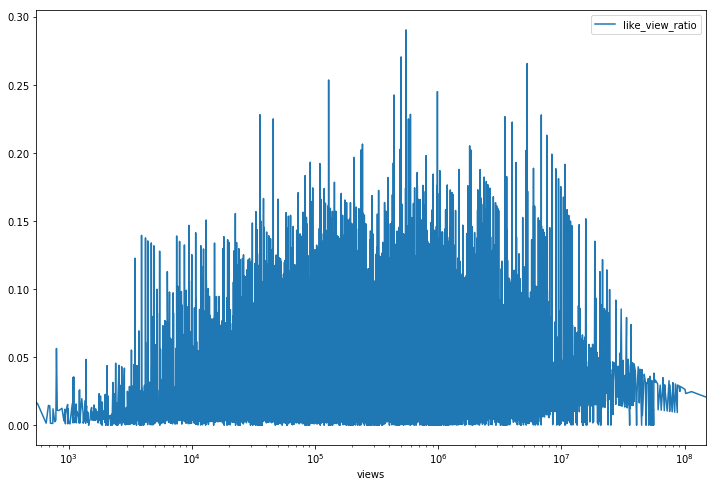

In [8]:
# Voeg ratios toe
trending['like_view_ratio'] = trending.likes / trending.views
# Ratio likes ten opzichte van views.
trending.sort_values(by='views').plot(x='views', y="like_view_ratio", figsize=(12,8), logx=True)


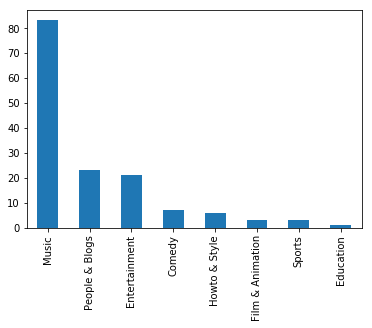

In [9]:
# Welke categorieën zijn sterk vertegenwoordigd bij de hoge ratio?
trending[trending.like_view_ratio > 0.15].category_name.value_counts().plot(kind='bar')

In [ ]:
gen_word_cloud(contro, 1, False)

In [ ]:
# Alle enkele woorden
titles = trending[trending.like_dislike_ratio > 1].title.values
gen_word_cloud(titles, 2, False)

In [ ]:
# Alle beschrijvingen bekijken, enkele woorden.
description = trending.description.values
gen_word_cloud(description, 3, False)

In [ ]:
# Biagrams van beschrijvingen
gen_word_cloud(description, 3, True)

In [ ]:
def stripTitles(titles,country):
    result= []
    stop = stopwords.words("english")
    for x in titles:
        temp = re.sub(r"[!.\(\)\[\],\´\';\'\-:\'\"\|\/\*\?\&]", "", str(x).lower())
        temp = re.sub(r" {2,}", " ", temp)
        
        for y in temp.split(" "):
            if y not in stop and re.fullmatch(r"\D+",y):
                result.append(y)
    resultDict=Counter(result)            
    words = pd.DataFrame.from_dict(resultDict,orient='index')
    words.columns=[country]
    words[country]=words[country]/len(words[country])
    return words
US=stripTitles(trending.title.values,"US")
CA=stripTitles(trending_CA.title.values,"CA")
UK=stripTitles(trending_UK.title.values,"UK")
US= US.join(CA).join(UK)
US["total"]=US.UK+US.US+US.CA

In [ ]:
US.sort_values("total",ascending=False)[["US","UK","CA"]][:30].plot(kind="bar",figsize=(20,20))

# Conclusie

In [ ]:
!jupyter nbconvert Slides.ipynb --to slides --post serve